<a href="https://colab.research.google.com/github/Devikasarwade/LGM_DATA-SCIENCE/blob/main/Stock_Market_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LetsGrowMore- Virtual Internship Program (VIP)- Data Science

Beginner Level Task

Name:- Devika Hanumant Sarwade

Task2:- Stock Market Prediction And Forecasting Using Stacked LSTM


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df=data.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


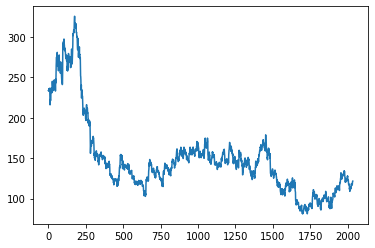

In [ ]:
d_close = df['Close']
plt.plot(d_close)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
training_size=int(len(d_close)*0.72)
test_size=len(d_close)-training_size
train_data=d_close[0:training_size,:]
test_data=d_close[training_size:len(d_close),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    x_data= []
    y_data= []
    for i in range(len(dataset)-time_step-1):
      x_data.append(dataset[i:(i+time_step), 0])
      y_data.append(dataset[i + time_step, 0])
      return np.array(x_data), np.array(y_data)


In [ ]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape

(1, 100, 1)

In [ ]:
y_train.shape

(1,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))

regressor.add(LSTM(units=50,return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(1))

In [ ]:
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.7922 - val_loss: 0.0040
Epoch 2/100
1/1 [==============================] - 0s 116ms/step - loss: 0.6073 - val_loss: 5.9991e-04
Epoch 3/100
1/1 [==============================] - 0s 109ms/step - loss: 0.4416 - val_loss: 3.5815e-04
Epoch 4/100
1/1 [==============================] - 0s 108ms/step - loss: 0.2865 - val_loss: 0.0050
Epoch 5/100
1/1 [==============================] - 0s 108ms/step - loss: 0.1451 - val_loss: 0.0183
Epoch 6/100
1/1 [==============================] - 0s 116ms/step - loss: 0.0361 - val_loss: 0.0466
Epoch 7/100
1/1 [==============================] - 0s 108ms/step - loss: 0.0019 - val_loss: 0.0893
Epoch 8/100
1/1 [==============================] - 0s 106ms/step - loss: 0.0710 - val_loss: 0.1109
Epoch 9/100
1/1 [==============================] - 0s 106ms/step - loss: 0.1099 - val_loss: 0.1056
Epoch 10/100
1/1 [==============================] - 0s 117ms/step - loss: 0.0831 - val_loss: 0.0874
Epoc

In [ ]:
train_predict=regressor.predict(x_train)
test_predict=regressor.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

293.6181080138761

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

175.36256388745278

In [ ]:
look_back = 100
train_predict_plot = np.empty_like(d_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [ ]:
test_predict_plot = np.empty_like(d_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(d_close)-1, :] = test_predict

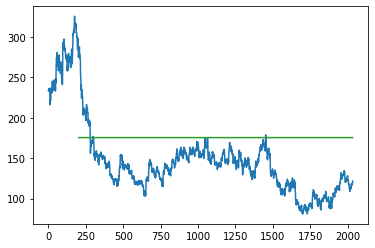

In [ ]:
plt.plot(scaler.inverse_transform(d_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [ ]:
len(test_data), x_test.shape

(570, (1, 100, 1))

In [ ]:
x_input = test_data[470:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()

In [ ]:
lt_output=[]
n_steps=100
next_No_Of_Days = 50
i=0

while(i<next_No_Of_Days):
    
        if(len(tem_input)>100):
           x_input=np.array(tem_input[1:])
           print("{} day input {}".format(i,x_input))
           x_input=x_input.reshape(1,-1)
           x_input = x_input.reshape((1, n_steps, 1))
           yt = regressor.predict(x_input, verbose=0)
           print("{} day output {}".format(i,yt))
           tem_input.extend(yt[0].tolist())
           tem_input=tem_input[1:]
           lt_output.extend(yt.tolist())
           i=i+1
        else:
           x_input = x_input.reshape((1, n_steps,1))
           yt = regressor.predict(x_input, verbose=0)
           print(yt[0])
           tem_input.extend(yt[0].tolist())
           print(len(tem_input))
           lt_output.extend(yt.tolist())
           i=i+1
    
print(lt_output)

[0.40382317]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

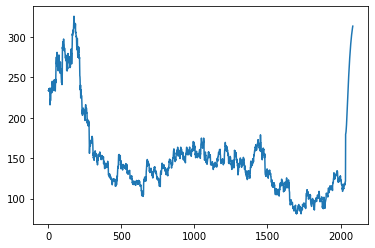

In [ ]:
df = d_close.tolist()
df.extend(lt_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)